In [51]:
import networkx as nx
from node2vec import Node2Vec
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def randomly_remove_links(G, n_missing):
    
    my_edges = np.array(list(G.edges))
    number_of_rows = my_edges.shape[0]
    rnd_idx = np.random.choice(number_of_rows,
                               size = n_missing,
                               replace = False)

    pair = my_edges[rnd_idx, :]
    
    for p in pair:
        G.remove_edge(p[0], p[1])
        
    return pair

def get_representation(G, params):
    
    dimensions, walk_length, num_walks, workers,\
    window, min_count, batch_words = params
    
    n2v = Node2Vec(G,
                   dimensions = dimensions,
                   walk_length = walk_length,
                   num_walks = num_walks,
                   workers = workers,
                   quiet = True,
                   )
    
    embedding = n2v.fit(window = window,
                        min_count = min_count,
                        batch_words = batch_words,
                        )
    

    representation = [] 
    n_node = G.number_of_nodes()
    
    for i in range(n_node):
        representation.append(embedding.wv['%d'%i])
    
    representation = np.array(representation)
    
    return representation

def calc_cosine_similarity(vec1, vec2):
    
    n = len(vec1)
    cos_sim = 0.
    
    for i in range(n):
        cos_sim += np.dot(vec1[i], vec2[i]) /\
        (np.linalg.norm(vec1[i]) * np.linalg.norm(vec2[i]))
    
    cos_sim /= n
    
    return cos_sim

def calc_euclidean_distance(vec1, vec2):
    
    n = len(vec1)
    euc_dist = 0.
    
    for i in range(n):
        euc_dist += np.linalg.norm(vec1[i] - vec2[i])
    
    euc_dist /= n
    
    return euc_dist
    

In [54]:
'''
Parameters
'''
n_node = 100 # size of ring lattice
n_missing = 1 # number of missing edges

dimensions = 100 # euclidean dimension to embedd
walk_length = 30 # number of nodes in each walk
num_walks = 100 # number of walks per node
workers = 10 # for cpu parallel work

window = 10 # Maximum distance between the current and predicted word within a sentence.
min_count = 1 #ignores all words with total frequency lower than this
batch_words = 4

repeat = 100

'''
Build network
'''

ring_lattice = nx.cycle_graph(n_node)
ring_missing = nx.cycle_graph(n_node)
removed_pairs = randomly_remove_links(ring_missing, n_missing)



'''
Get vector representation
'''

param = [dimensions, walk_length, num_walks, workers,
        window, min_count, batch_words]

# for node1 belonging to one end of the missing edge
list_dist_control1 = []
list_cosim_control1 = []
list_dist_exp1 = []
list_cosim_exp1 = []

# for node2 belonging to the other end of the missing edge
list_dist_control2 = []
list_cosim_control2 = []
list_dist_exp2 = []
list_cosim_exp2 = []

for i in range(repeat):
    print(f'{i}-th iteration')
    rep_ring = get_representation(ring_lattice, param)
    rep_ring_cont = get_representation(ring_lattice, param)
    rep_ring_exp = get_representation(ring_missing, param)

    '''
    Calcualte euclidean distance
    '''
    node1 = removed_pairs[0][0]
    node2 = removed_pairs[0][1]
    dist_control = calc_euclidean_distance(rep_ring[node1],
                                           rep_ring_cont[node1])
    cosim_control = calc_cosine_similarity(rep_ring[node1],
                                           rep_ring_cont[node1])

    dist_exp = calc_euclidean_distance(rep_ring[node1],
                                       rep_ring_exp[node1])
    cosim_exp = calc_cosine_similarity(rep_ring[node1],
                                       rep_ring_exp[node1])
    
    list_dist_control1.append(dist_control)
    list_cosim_control1.append(cosim_control)
    list_dist_exp1.append(dist_exp)
    list_cosim_exp1.append(cosim_exp)
    
    dist_control = calc_euclidean_distance(rep_ring[node2],
                                           rep_ring_cont[node2])
    cosim_control = calc_cosine_similarity(rep_ring[node2],
                                           rep_ring_cont[node2])

    dist_exp = calc_euclidean_distance(rep_ring[node2],
                                       rep_ring_exp[node2])
    cosim_exp = calc_cosine_similarity(rep_ring[node2],
                                       rep_ring_exp[node2])
    
    
    list_dist_control2.append(dist_control)
    list_cosim_control2.append(cosim_control)
    list_dist_exp2.append(dist_exp)
    list_cosim_exp2.append(cosim_exp)


0-th iteration
1-th iteration
2-th iteration
3-th iteration
4-th iteration
5-th iteration
6-th iteration
7-th iteration
8-th iteration
9-th iteration
10-th iteration
11-th iteration
12-th iteration
13-th iteration
14-th iteration
15-th iteration
16-th iteration
17-th iteration
18-th iteration
19-th iteration
20-th iteration
21-th iteration
22-th iteration
23-th iteration
24-th iteration
25-th iteration
26-th iteration
27-th iteration
28-th iteration
29-th iteration
30-th iteration
31-th iteration
32-th iteration
33-th iteration
34-th iteration
35-th iteration
36-th iteration
37-th iteration
38-th iteration
39-th iteration
40-th iteration
41-th iteration
42-th iteration
43-th iteration
44-th iteration
45-th iteration
46-th iteration
47-th iteration
48-th iteration
49-th iteration
50-th iteration
51-th iteration
52-th iteration
53-th iteration
54-th iteration
55-th iteration
56-th iteration
57-th iteration
58-th iteration
59-th iteration
60-th iteration
61-th iteration
62-th iteration
63

(0.0, 30.0)

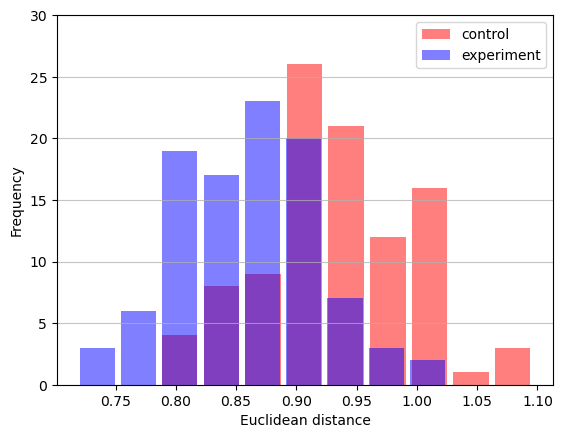

In [55]:
n, bins, patches = plt.hist(x = list_dist_control1,
                            bins = 'auto', 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

n, bins, patches = plt.hist(x = list_dist_exp1,
                            bins = 'auto', 
                            color = 'blue',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'experiment',
                            )

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Euclidean distance')
plt.ylabel('Frequency')
plt.legend()
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 30.0)

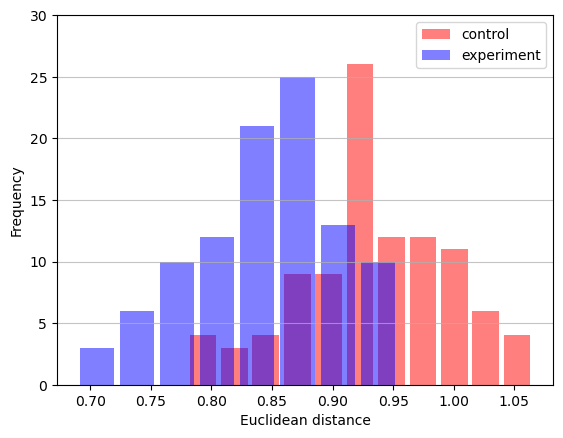

In [56]:
n, bins, patches = plt.hist(x = list_dist_control2,
                            bins = 'auto', 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

n, bins, patches = plt.hist(x = list_dist_exp2,
                            bins = 'auto', 
                            color = 'blue',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'experiment',
                            )

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Euclidean distance')
plt.ylabel('Frequency')
plt.legend()
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 30.0)

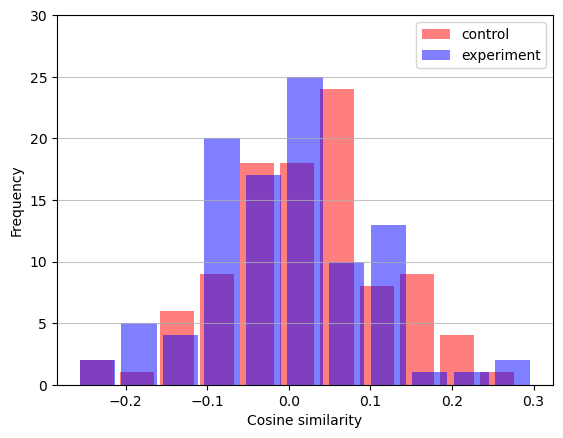

In [57]:
n, bins, patches = plt.hist(x = list_cosim_control1,
                            bins = 'auto', 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

n, bins, patches = plt.hist(x = list_cosim_exp1,
                            bins = 'auto', 
                            color = 'blue',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'experiment',
                            )

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.legend()
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 30.0)

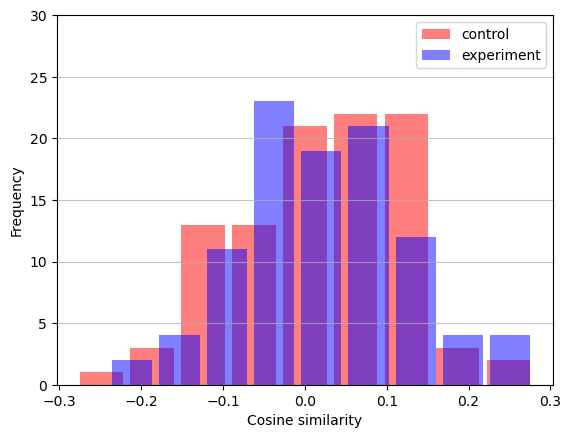

In [58]:
n, bins, patches = plt.hist(x = list_cosim_control2,
                            bins = 'auto', 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

n, bins, patches = plt.hist(x = list_cosim_exp2,
                            bins = 'auto', 
                            color = 'blue',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'experiment',
                            )

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.legend()
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [59]:
list_cosim_control = list_cosim_control1 + list_cosim_control2
list_cosim_exp = list_cosim_exp1 + list_cosim_exp2
list_dist_control = list_dist_control1 + list_dist_control2
list_dist_exp = list_dist_exp1 + list_dist_exp2

(0.0, 50.0)

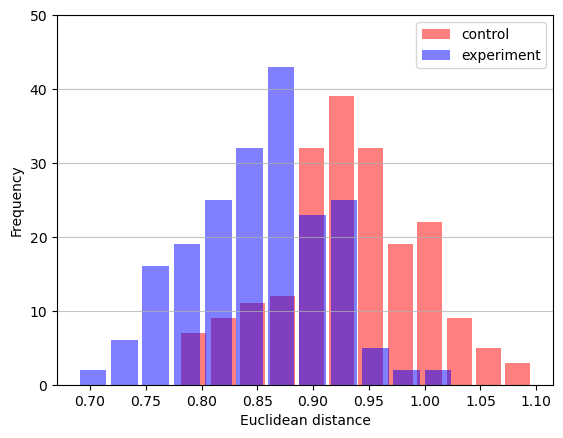

In [60]:
n, bins, patches = plt.hist(x = list_dist_control,
                            bins = 'auto', 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

n, bins, patches = plt.hist(x = list_dist_exp,
                            bins = 'auto', 
                            color = 'blue',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'experiment',
                            )

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Euclidean distance')
plt.ylabel('Frequency')
plt.legend()
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 50.0)

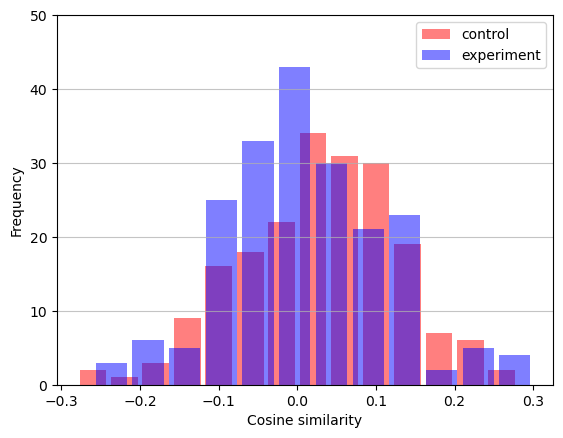

In [61]:
n, bins, patches = plt.hist(x = list_cosim_control,
                            bins = 'auto', 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

n, bins, patches = plt.hist(x = list_cosim_exp,
                            bins = 'auto', 
                            color = 'blue',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'experiment',
                            )

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.legend()
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)